# Problem 1: check permutation

LC: Check if a List of numbers is a permutation. Coded an O(N) Time and O(1) space solution.

In [1]:
from typing import List, Dict
def checkPermutation(nums: List[int]) -> bool:
    for i in range(len(nums)):
        if nums[i] > len(nums):
            return False
        if nums[i] <= 0:
            return False
    for i in range(len(nums)):
        nums[abs(nums[i])-1] = -nums[abs(nums[i])-1]
    for i in range(len(nums)):
        if nums[i] > 0:
            return False
    return True

In [2]:
assert checkPermutation([4,2,1,5,6,1,1]) == False
assert checkPermutation([3,2,6,5,1,7,4]) == True
assert checkPermutation([2]) == False
assert checkPermutation([]) == True

# Problem 2: Valid paths to go around towns

Here are multiple towns within one City. And sometimes people may travel through different towns
Suppose you are given the start towns and end towns for each trip, and there might be many trips
Can you find all valid trips?
You can only use one trip only one time, must use all trips
You can assume there are at least one valid solution

Let's assume you will always start from 'A'
```
Example 1
Input: [['A', 'B'], ['B', 'C'], ['C', 'D'], ['D', 'E']]
Assum you will always start with 'A'
Meaning: A ==> B, B ==> C, C ==> D, D ==> E
Output: [A, B, C, D, E]

Example 2
Input: [['A', 'B'], ['B', 'C'], ['C', 'B'], ['B', 'A'],["A","C]]
A ==> B, B ==> C, C ==> B, B ==> A, A ==> C
Output_1: A, B, C, B, A, C
Output_2: A, C, B, A, B, C
Output_3: A, C, B, A, B, C
final output should be [[ A, B, C, B, A, C],[A, C, B, A, B, C],[A, B, A, C, B, C]]
```


In [3]:
# assume given trips are identical
def GetPaths(trips: List[List[str]]) -> List[List[str]]:
    def DFS(node, cur_trip, res, n_trips):
        #print(cur_trip)
        if len(cur_trip) == n_trips+1:
            res.append(cur_trip)
        
        if node in adj_m:
            for nn in adj_m[node].keys():
                if adj_m[node][nn]:
                    adj_m[node][nn] = False
                    DFS(nn, cur_trip+[nn], res, n_trips)
                    adj_m[node][nn] = True
            
    adj_m = {}
    for t in trips:
        if t[0] not in adj_m:
            adj_m[t[0]] = {}
        adj_m[t[0]][t[1]] = True
    res = []
    n_trips = len(trips)
    DFS('A', ['A'], res, n_trips)
    return res

In [4]:
GetPaths([['A', 'B'], ['B', 'C'], ['C', 'B'], ['B', 'A'],["A","C"]])

[['A', 'B', 'C', 'B', 'A', 'C'],
 ['A', 'B', 'A', 'C', 'B', 'C'],
 ['A', 'C', 'B', 'A', 'B', 'C']]

# Problem 3: card games

玩一种卡牌游戏。牌的两面各写一个数字，当两张牌的各自一面有相同数字的时候可以连起来， 比如牌[1, 3]和牌[3,7] 可以通过3连起来，牌不分正反面，[1, 3]可以用作[3, 1]。
input是一些牌，要output用这些牌最长能连多少张牌。
```Python
example input
[1, 3] [5, 7] [3, 7] [8, 5] [10, 11]
output 4 ( [1, 3] → [3, 7] → [7, 5] → [5, 8])‍‍‍‍‍‌‍‍‍‌‌‌‍‌‌‍
```
不允许用dfs，要求复杂度很低

In [5]:
from typing import List, Dict
def ConnectedComp(nodes: List[int], adj_m: Dict[int,List[int]]) -> List[List[int]]:
    res = []
    for n in nodes.keys():
        if nodes[n]:
            queue = [n]
            p = 0
            nodes[n] = False
            while p < len(queue):
                x = queue[p]
                for y in adj_m[x]:
                    if nodes[y]:
                        queue.append(y)
                        nodes[y] = False
                p += 1
            res.append(queue)
    return res

def LongestSeqConnected(nodes: List[int], adj_m: Dict[int,List[int]]) -> List[int]:
    start_node =  nodes[0]
    for n in nodes[1:]:
        if n in adj_m:
            if len(adj_m[n]) % 2 == 1 and len(adj_m[n]) < len(adj_m[start_node]):
                start_node = n
    stack = [start_node]
    res = []
    m = {}
    for k, v in adj_m.items():
        m[k] = {}
        for x in v:
            m[k][x] = True
    while len(stack) > 0:
        while stack[-1] in m and len(m[stack[-1]]) > 0:
            x = m[stack[-1]].popitem()
            del m[x[0]][stack[-1]]   # remove the other edge
            stack.append(x[0])
        res.append(stack.pop())
    return res[::-1]

#def LongestSeqConnected(nodes: List[int], adj_m: Dict[int,List[int]]) -> List[int]:
    

def LongestSeq(cards: List[List[int]]) -> int:
    if len(cards) == 0:
        return 0
    adj_m = {}
    nodes = {}
    for e in cards:
        if e[0] not in adj_m:
            adj_m[e[0]] = []
        adj_m[e[0]].append(e[1])
        if e[1] not in adj_m:
            adj_m[e[1]] = []
        adj_m[e[1]].append(e[0])
        if e[0] not in nodes:
            nodes[e[0]] = True
        if e[1] not in nodes:
            nodes[e[1]] = True
    connected_comps = ConnectedComp(nodes, adj_m)
    paths = []
    for comp in connected_comps:
        paths.append(LongestSeqConnected(comp, adj_m))
    
    return max([len(p) for p in paths])-1

In [6]:
LongestSeq([[2,5],[4,8],[5,4],[3,7],[8,2],[1,7]])

4

In [7]:
# Test cases
# 1. sample case
assert LongestSeq([[1,3], [5,7], [3,7], [8,5], [10,11]]) == 4
# 2. no edges
assert LongestSeq([]) == 0
# 3. cycle
assert LongestSeq([[i, (i+1) % 1000] for i in range(1000)]) == 1000
# 4. star
assert LongestSeq([[1,i] for i in range(2,100)]) == 2
# 5. trail: find the correct start 8,4,1,9,6,3,1,2,5,7
assert LongestSeq([[2,5],[1,4],[6,9],[7,5],[1,2],[3,6],[1,9],[4,8],[1,3]]) == 9
# 6. Multiple connected components
assert LongestSeq([[2,5],[4,8],[5,4],[3,7],[8,2],[1,7]]) == 4
# 7. two stars, find the correct starting point
assert LongestSeq([[1,2],[1,3],[1,4],[1,5],[1,6],[4,7],[4,8],[4,9],[4,10]]) == 3
# 8. find the correct starting point 8,2,1,3,2,6,7
assert LongestSeq([[1,2],[2,3],[3,1],[4,3],[2,8],[5,2],[6,7],[2,6]]) == 6

AssertionError: 

# Problem 4

给了一道小车开车的题，问给N个长方形障碍物，每个障碍物坐标格式大概是{lower_left_x, lower_left_y,upper_right_x,upper_right_y}在一个X轴[0,100], Y不限制的这么一段路上。想判断路有没有被障碍物堵死，长方形挨着一点点就算堵

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle as plotRect

class Rectangle:
    def __init__(self, lower_left, upper_right):
        self.lower_left_x = lower_left[0]
        self.lower_left_y = lower_left[1]
        self.upper_right_x = upper_right[0]
        self.upper_right_y = upper_right[1]

def plot_rectangles(rectangles: List[Rectangle]):

    #define Matplotlib figure and axis
    fig, ax = plt.subplots()

    #add rectangle to plot
    for i in range(len(rectangles)):
        rect = rectangles[i]
        ax.add_patch(plotRect((rect.lower_left_x, rect.lower_left_y), 
                               rect.upper_right_x-rect.lower_left_x , 
                               rect.upper_right_y-rect.lower_left_y,
                              fill=False))
        ax.annotate(f"R{i}", ((rect.lower_left_x + rect.upper_right_x)/2, (rect.lower_left_y + rect.upper_right_y)/2), 
                    color='blue', weight='bold', 
                fontsize=6, ha='center', va='center')
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])

    #display plot
    plt.show()


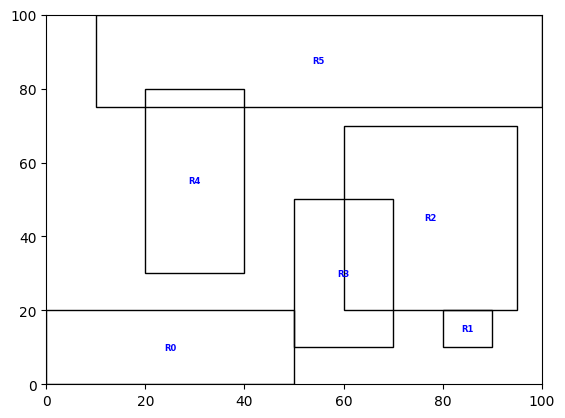

In [9]:
R1 = Rectangle((0,0),(50,20))
R2 = Rectangle((80,10),(90,20))
R3 = Rectangle((60,20),(95,70))
R4 = Rectangle((50,10),(70,50))
R5 = Rectangle((20,30),(40,80))
R6 = Rectangle((10,75),(100,100))
l3 = [R1, R2, R3, R4, R5, R6]
plot_rectangles(l3)

In [10]:
import random
def generate_rectangles(n = 10, random_seed = 43):
    recs = []
    random.seed(random_seed)
    for i in range(n):
        centers = [random.random()*100 for _ in range(2)]
        width = random.random()*50
        height = random.random()*50
        recs.append(Rectangle((max([centers[0]-width/2,0]), max([centers[1]-height/2,0])), 
                              (min([centers[0]+width/2,100]), min([centers[1]+height/2,100]))))
    return recs

In [11]:
import heapq

def CheckBlock2D(rectangles: List[Rectangle]) -> bool:
    '''
        Output True if rectangles block the road, otherwise output False
        Construct grids using the sides of all rectangles, each rectangle is a block
        starting from the grids not being blocked at bottom, use BFS to see if any of the grid at the top is reachable.
        O(n^2) time complexity, O(n^2) space complexity
    '''
    xs = sorted(list(set([rec.lower_left_x for rec in rectangles]+[rec.upper_right_x for rec in rectangles])))
    ys = sorted(list(set([rec.lower_left_y for rec in rectangles]+[rec.upper_right_y for rec in rectangles])))
    m, n = len(xs)-1, len(ys)-1
    grid = [[0 for i in range(m)] for j in range(n)]
    xdict = {xs[i]: i for i in range(m+1)}
    ydict = {ys[j]: j for j in range(n+1)}
    for rec in rectangles:
        for i in range(ydict[rec.lower_left_y], ydict[rec.upper_right_y]):
            for j in range(xdict[rec.lower_left_x], xdict[rec.upper_right_x]):
                grid[i][j] = 1

    queue = []
    visited = {}
    for i in range(m):
        if grid[0][i] == 0:
            queue.append([0,i])
            visited[(0,i)] = True
    p = 0
    while p < len(queue):
        g = queue[p]
        if g[0]-1>=0 and (g[0]-1,g[1]) not in visited and grid[g[0]-1][g[1]] == 0:
            queue.append([g[0]-1,g[1]])
            visited[(g[0]-1,g[1])] = True
        if g[0]+1<n and (g[0]+1,g[1]) not in visited and grid[g[0]+1][g[1]] == 0:
            if g[0]+1 == n-1:
                return False
            queue.append([g[0]+1,g[1]])
            visited[(g[0]+1,g[1])] = True
        if g[1]-1>=0 and (g[0],g[1]-1) not in visited and grid[g[0]][g[1]-1] == 0:
            queue.append([g[0],g[1]-1])
            visited[(g[0],g[1]-1)] = True
        if g[1]+1<m and (g[0],g[1]+1) not in visited and grid[g[0]][g[1]+1] == 0:
            queue.append([g[0],g[1]+1])
            visited[(g[0],g[1]+1)] = True
        p += 1
    return True

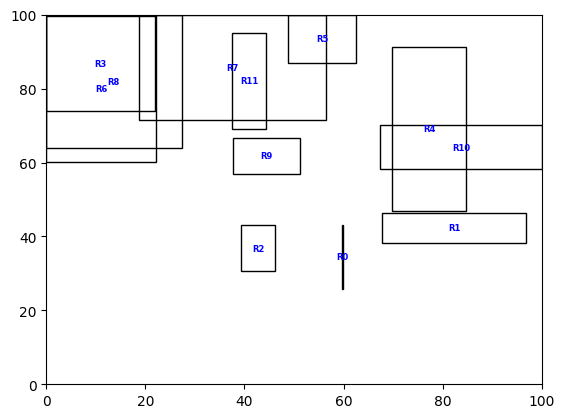

False

In [12]:
l = generate_rectangles(n=12, random_seed=300)
plot_rectangles(l)
CheckBlock2D(l)

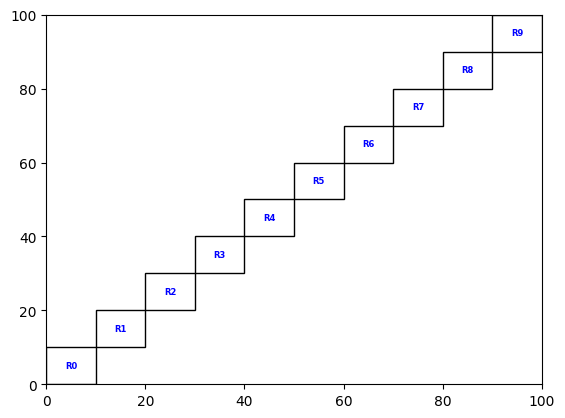

True

In [13]:
l = []
for i in range(0,100,10):
    l.append(Rectangle((i,i),(i+10,i+10)))
plot_rectangles(l)
CheckBlock2D(l)

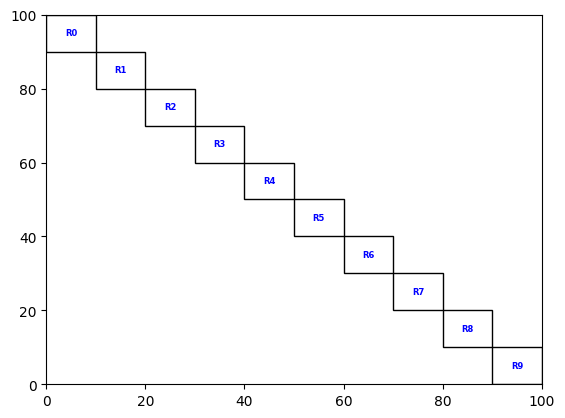

True

In [14]:
l = []
for i in range(0,100,10):
    l.append(Rectangle((i,90-i),(i+10,100-i)))
plot_rectangles(l)
CheckBlock2D(l)

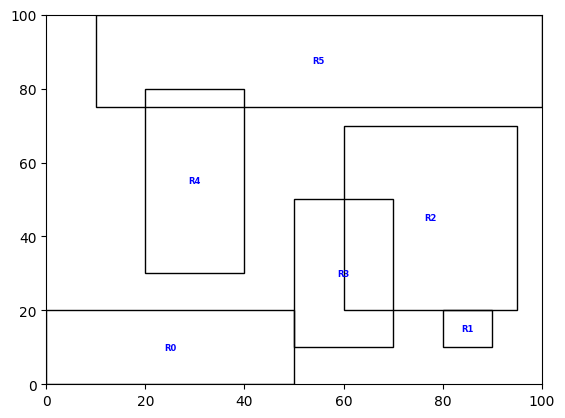

False

In [15]:
R1 = Rectangle((0,0),(50,20))
R2 = Rectangle((80,10),(90,20))
R3 = Rectangle((60,20),(95,70))
R4 = Rectangle((50,10),(70,50))
R5 = Rectangle((20,30),(40,80))
R6 = Rectangle((10,75),(100,100))
l = [R1, R2, R3, R4, R5, R6]
plot_rectangles(l)
CheckBlock2D(l)

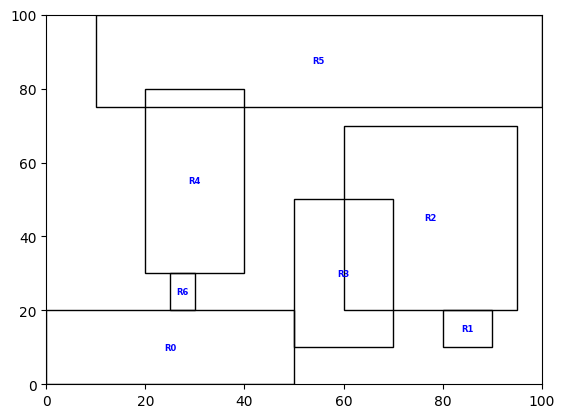

True

In [16]:
R1 = Rectangle((0,0),(50,20))
R2 = Rectangle((80,10),(90,20))
R3 = Rectangle((60,20),(95,70))
R4 = Rectangle((50,10),(70,50))
R5 = Rectangle((20,30),(40,80))
R6 = Rectangle((10,75),(100,100))
R7 = Rectangle((25,20),(30,30))
l = [R1, R2, R3, R4, R5, R6,R7]
plot_rectangles(l)
CheckBlock2D(l)